In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
data = pd.read_csv('sample_data.csv')
print(data.shape)
data.sample(5)

(32518, 4)


,Time [s],Velocity [km/h],Acceleration [m/s^2],Battery_Voltage [V]
24958,2495.8,51.59195,0.44838,373.01112
26288,2628.8,67.89120,-0.06828,374.90000
7905,790.5,36.30355,-0.14968,385.88298
19270,1927.0,52.05702,0.42425,374.60000
22588,2258.8,44.33309,-0.40098,381.01011


In [3]:
data['Time [s]'] = pd.to_datetime(data['Time [s]'])
data['Time [s]'] = data.index
data.dtypes

,0
Time [s],int64
Velocity [km/h],float64
Acceleration [m/s^2],float64
Battery_Voltage [V],float64


In [4]:
#plt.plot(data['Time [s]'], data['Acceleration [m/s^2]'])

df = data.drop('Time [s]', axis = 1)
df.sample(5)

,Velocity [km/h],Acceleration [m/s^2],Battery_Voltage [V]
22839,31.11789,-0.16489,378.73072
5576,45.00953,-0.45854,388.83294
15244,49.63634,-0.36314,379.53572
5429,48.02607,-0.34639,386.50083
20488,38.99180,-0.46984,380.93285


Text(0.5, 0, 'Time (seconds)')

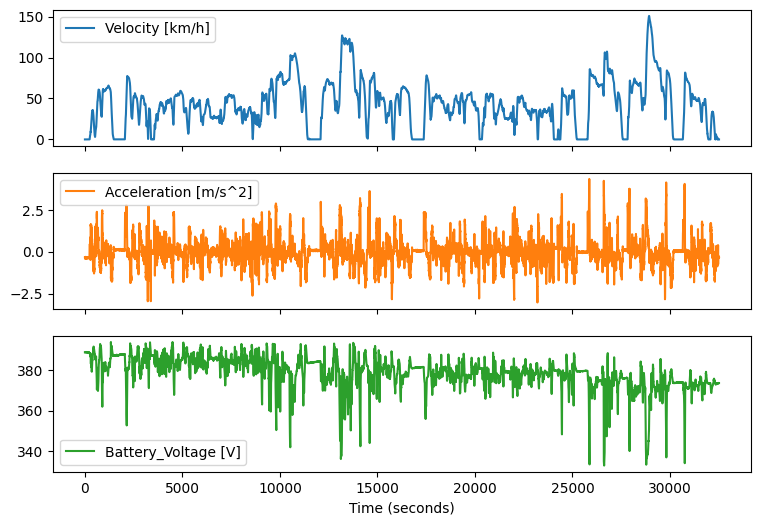

In [5]:
df.plot(subplots = True, figsize = (9, 6))
plt.xlabel('Time (seconds)')

In [6]:
#Determine Features

N = data.shape[0]  #length of the array = number of samples
time = data['Time [s]']
#Fs = 1/(time[1]- time[0]) 	#sampling rate (Hz)
Fs = 10   #Hz
T = 1/Fs
accel = df['Acceleration [m/s^2]']

print(N, Fs, T)

32518 10 0.1


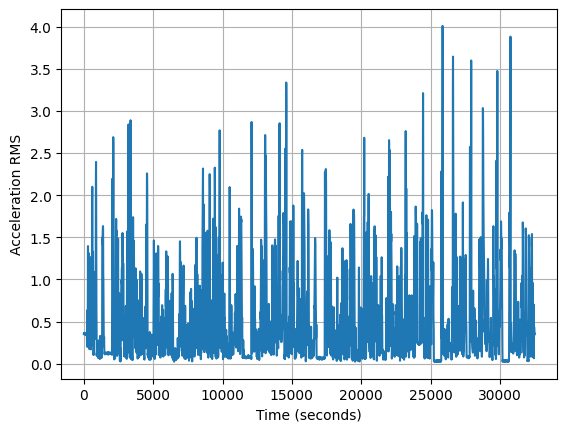

In [7]:
#Compute RMS & Plot

w = np.floor(Fs)                #width of the window for computing RMS
w = w.astype(int)
steps = np.int_(np.floor(N/w)); #number of steps for RMS
t_RMS = np.zeros((steps, 1))     #create array for RMS time values
x_RMS = np.zeros((steps, 1))     #create array for RMS values
for i in range (0, steps):
	t_RMS[i] = np.mean(time[(i*w):((i+1)*w)]);
	x_RMS[i] = np.sqrt(np.mean(accel[(i*w):((i+1)*w)]**2));
plt.figure()
plt.plot(t_RMS, x_RMS)
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration RMS')
#plt.title('Acceleration RMS with time')
plt.grid()

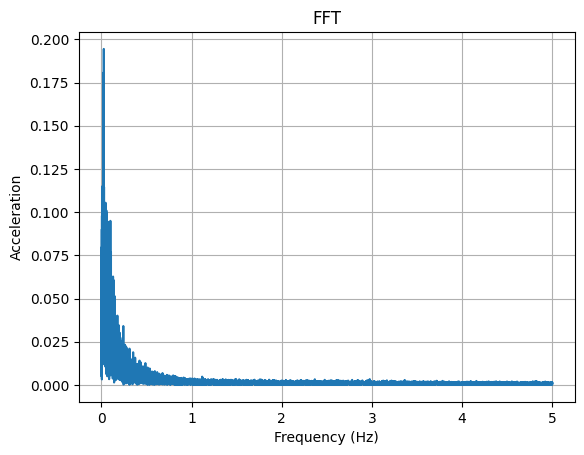

In [9]:
#Compute FFT and Plot

plt.figure()
xf = np.linspace(0, (1/(2*T)), int(N/2))
yf = scipy.fftpack.fft(np.array(accel))
plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Acceleration')
plt.title('FFT')
plt.show()

<ipython-input-10-db12c1f540c6>:5: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t2, f, np.log(Sxx))


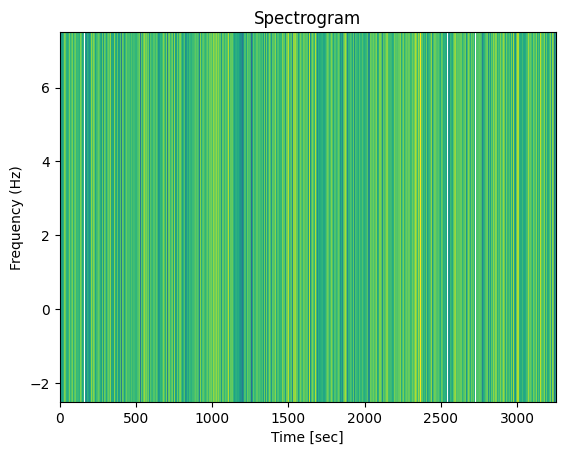

In [10]:
#Compute Spectrogram and Plot

plt.figure(4)
f, t2, Sxx = scipy.signal.spectrogram(accel, Fs, nperseg = int(Fs/4))
plt.pcolormesh(t2, f, np.log(Sxx))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.show()